# 공분산과 상관계수

다변수 확률변수 간의 상관 관계를 숫자료 나타낸 것이 공분산(covariance)과 상관계수(correlation coefficient)이다. 

## 표본공분산

표본 공분산(sample covariance)은 다음과 같이 정의된다. 여기에서 $x_i$와 $y_i$는 각각 $i$번째의 $x$ 자료와 $y$자료의 값을 가리키고, $\bar{x}$와 $\bar{y}$는 $x$ 자료와 $y$자료의 표본평균을 가리킨다.

$$ s_{xy} = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-\bar{x})(y_i-\bar{y}) $$

표본분산과 마찬가지로 표본공분산도 자료가 평균값으로부터 얼마나 떨어져 있는지를 나타낸것이다. 공분산은 평균값 위치와 표본 위치를 연결하는 사각형의 면적을 사용한다. 다만 공분산의 경우에는 자료의 위치에 따라 이 값의 부호가 달라진다. 데이터가 1사분면이나 3사분면에 있는 경우에는 양수가 되고 데이터가 2사분면이나 4사분면에 있는 경우에는 음수가 된다. 따라서 공분산의 부호는 $X$, $Y$ 데이터가 같은 부호를 가지는지 다른 부호를 가지는지에 대한 지표라고 할 수 있다.

<img src="https://datascienceschool.net/upfiles/f5ba6e3136ad41aeafb8abacfcb1c93a.png" style="width: 100%">

## 표본 상관계수

표본 공분산은 평균을 중심으로 각 자료들이 어떻게 분포되어 있는지 크기와 방향성을 같이 보여준다. 그런데 분포의 크기는 공분산이 아닌 분산만으로도 알 수 있기 때문에 대부분의 경우 자료 분포의 방향성만 분리하여 보는 것이 유용하다. 이 때 필요한 것이 **표본 상관계수(sample correlation coefficient)**이다.

표본 상관계수는 다음과 같이 공분산을 각각의 표본 표준편차값으로 나누어 정규화(normalize)하여 정의한다.

$$ r_{xy} = \dfrac{s_{xy}}{\sqrt{s^2_{x} \cdot s^2_{y}}} $$

이와 다르게 정의한 상관계수도 있기 때문에 다른 종류의 상관계수와 비교하여 말하는 경우에는 **피어슨(Pearson) 상관계수**라고 하기도 한다.

## 확률변수의 공분산과 상관계수

두 확률변수 $X$와 $Y$의 공분산은 기댓값 연산자를 사용하여 다음과 같이 정의된다.

$$ \text{Cov}[X, Y] = \text{E}[(X - \text{E}[X])(Y - \text{E}[Y])]$$

마찬가지로 두 확률변수 $X$와 $Y$의 상관 계수도 다음과 같이 정의한다.

$$ \rho[X,Y] =  \dfrac{\text{Cov}[X, Y]}{\sqrt{\text{Var}[X] \cdot \text{Var}[Y]}} $$

확률변수의 상관계수는 다음과 같은 성질을 가진다.

$$ -1 \leq \rho \leq 1 $$



또한 $\rho$가 -1, 0, 1인 경우를 각각 다음과 같이 부른다.

* $\rho = 1$ : 완전선형 상관관계
* $\rho = 0$ : 무상관 (독립과는 다름)
* $\rho = −1$ : 완전선형 반상관관계



이 상관계수의 부호와 크기가 의미하는 바는 다음 스캐터 플롯에서 알 수 있다. 이 스캐터 플롯은 특정한 상관계수를 가지는 데이터를 시뮬레이션을 통해 그린 것이다. 스캐터 플롯의 위에 쓰여진 숫자는 시뮬레이션에 사용된 상관계수를 나타낸다. 스캐터 플롯의 데이터가 양의 기울기를 가지는 직선 혹은 타원 모양을 가지면 상관계수는 양수이고 음의 기울기를 가지는 직선 혹은 타원 모양이 되면 상관계수가 음이 된다. 또한 직선 모양이 뚜렷할수록 상관계수의 절대값이 커지고 원에 가까워질 수록 절대값이 작아진다.

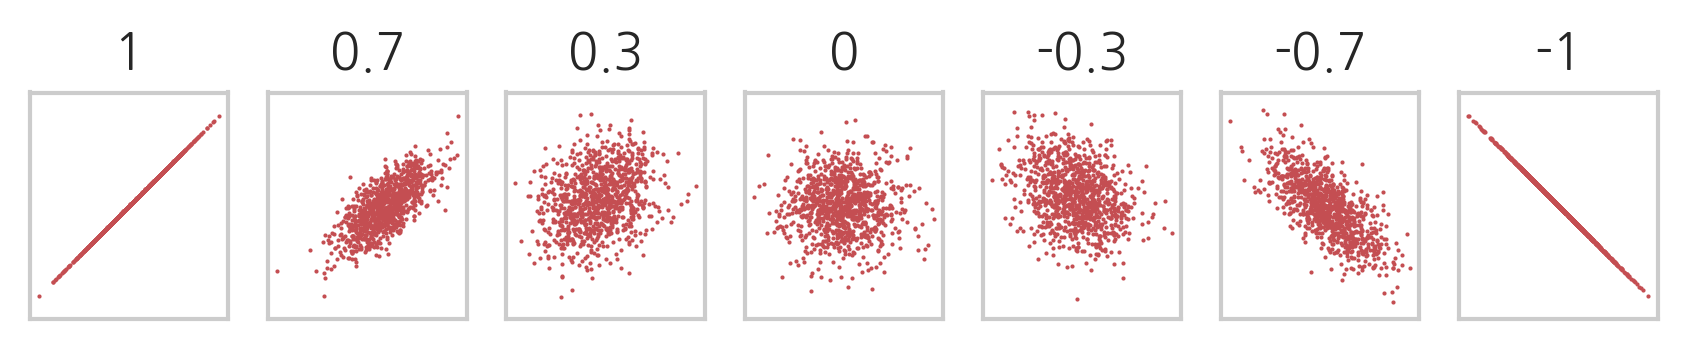

In [3]:
np.random.seed(0)
corrs = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(corrs), 1))
for i, r in enumerate(corrs):
    x, y = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], 1000).T
    plt.subplot(1, len(corrs), i + 1)
    plt.plot(x, y, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    plt.title(r)
plt.show()

또한 상관계수는 스캐터 플롯의 기울기와는 아무런 상관이 없다.

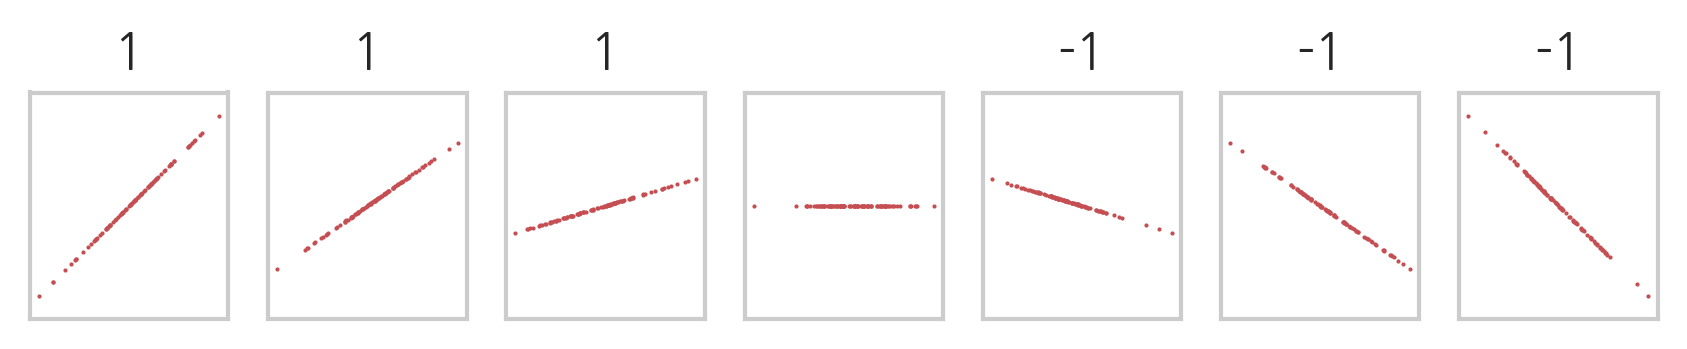

In [4]:
np.random.seed(1)
slope = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(slope), 1))
for i, s in enumerate(slope):
    plt.subplot(1, len(slope), i + 1)
    x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 100).T
    y2 = s * y
    plt.plot(x, y2, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    if s > 0:
        plt.title(1)
    if s < 0:
        plt.title(-1)
plt.show()

상관계수로 분포의 형상을 추측할 때 주의할 점은 개별 자료가 상관계수에 미치는 영향력이 각각 다르다는 점이다. 다음은 [Frank Anscombe]( https://en.wikipedia.org/wiki/Frank_Anscombe)의 논문에 예시된 자료로 서로 다른 4종류의 2차원 데이터셋을 포함하는데 4종류 데이터셋 모두 상관계수가 약 0.816로 동일하다. 

세번째 데이터셋과 네번째 데이터셋에서 볼 수 있듯이 나머지 데이터의 상관계수가 1 또는 0인 경우에도 단 하나의 특이값 자료에 의해 상관계수가 크게 달라질 수 있다.

In [5]:
data = sm.datasets.get_rdataset("anscombe")
df = data.data
df

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


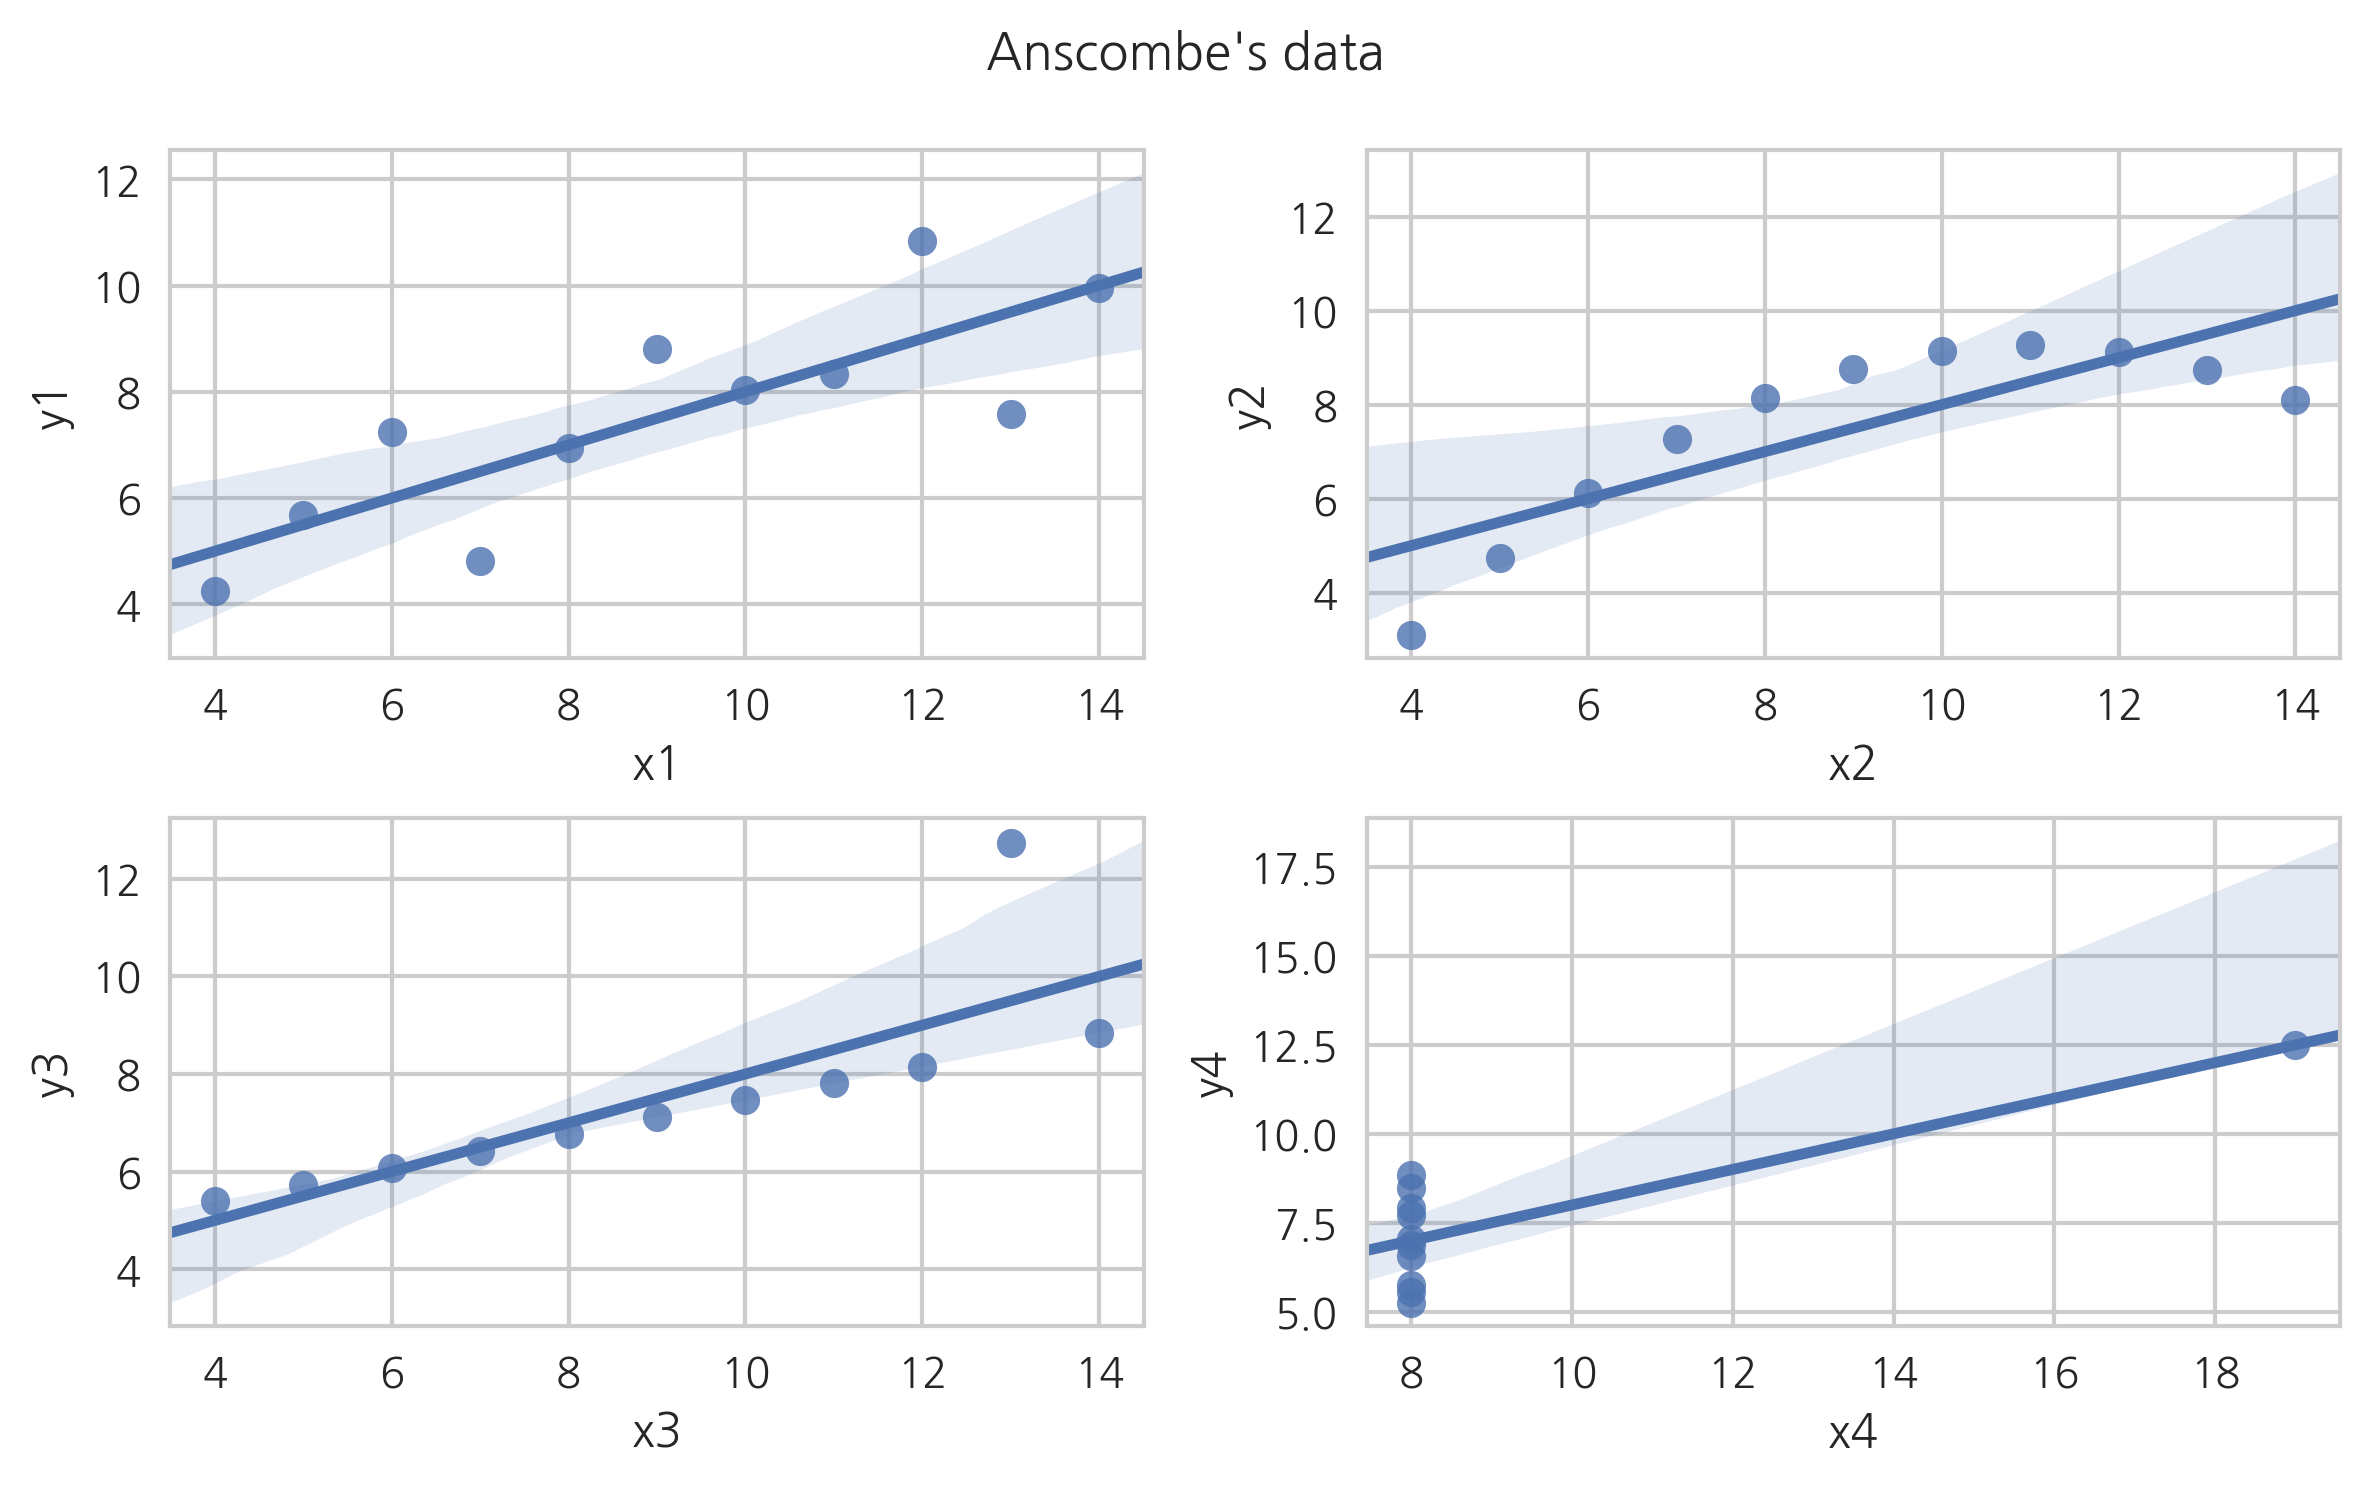

In [6]:
plt.subplot(221)
sns.regplot(x="x1", y="y1", data=df)
plt.subplot(222)
sns.regplot(x="x2", y="y2", data=df)
plt.subplot(223)
sns.regplot(x="x3", y="y3", data=df)
plt.subplot(224)
sns.regplot(x="x4", y="y4", data=df)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Anscombe's data")
plt.show()

## 다변수 확률변수의 표본 공분산

이번에는 스칼라가 아닌 벡터 표본값을 가지는 다변수 확률변수의 공분산에 대해 알아본다. 
예를 들어 $M$차원 확률변수 $x = (x_1, x_2, \cdots, x_M)$를 생각하자. (지금까지는 확률변수를 대문자로 표시했지만 여기에서는 데이터 행렬과 구분하기 위해 소문자로 표시한다.) $x_1, x_2, \cdots, x_M$ 각각은 스칼라 확률변수가 된다.

이 확률변수의 $N$개의 표본값을 구하면 다음처럼 $N \times M$차원의 특징 행렬(feature matrix) $X$가 나온다.

$$
X = 
\begin{bmatrix}
x_{1, 1} & x_{1, 2} & \cdots   & x_{1, M} \\
x_{2, 1} & x_{2, 2} & \cdots   & x_{2, M} \\
\vdots   & \vdots   & \ddots   & \vdots   \\
x_{N, 1} & x_{N, 2} & \cdots   & x_{N, M} \\
\end{bmatrix}
$$

이 행렬의 각 열은 각각 확률변수 $x_1, x_2, \cdots, x_M$의 표본이다. 예를 들어 $X$ 행렬의 첫번째 열 $c_1$은 확률변수 $x_1$의 표본 데이터이다.

$$
c_1 = 
\begin{bmatrix}
x_{1, 1}\\
x_{2, 1}\\
\vdots  \\
x_{N, 1}
\end{bmatrix}
$$

이러한 데이터가 있을 때, 각 확률변수 $x_j\,(j=1, \cdots, M)$의 기댓값은 다음처럼 계산할 수 있다.

$$
\text{E}[x_j] = \bar{x}_j = \dfrac{1}{N} \sum_{i=1}^N x_{i,j}
 = \dfrac{1}{N} \mathbf{1}_N^T c_j = \dfrac{1}{N} c_j^T \mathbf{1}_N 
$$

위 식에서 $\mathbf{1_N}$은 $N$차원 일(ones) 벡터이다.

이 기댓값을 벡터로 모은 기댓값 벡터는 다음처럼 정의한다.

$$
\bar{x} = 
\begin{bmatrix}
\bar{x}_1 \\
\bar{x}_2 \\
\vdots  \\
\bar{x}_M
\\
\end{bmatrix}
$$

각 확률변수 $x_j\,(j=1, \cdots, M)$의 분산은 다음처럼 계산할 수 있다.

$$
\text{Var}[x_j] = s_j^2 = \dfrac{1}{N} \sum_{i=1}^N (x_{i,j} - \bar{x}_j)^2
$$

두 확률변수 $x_j, x_k$의 공분산은 다음처럼 구한다.

$$
\text{Var}[x_j, x_k] = s_{j,k} = \dfrac{1}{N} \sum_{i=1}^N (x_{i,j} - \bar{x}_j)(x_{i,k} - \bar{x}_k)
$$


모든 확률변수의 조합에 대해 분산과 공분산을 구하면 다음처럼 **표본공분산 행렬(Sample Covariance Matrix)**을 정의할 수 있다. 

$$
S =
\begin{bmatrix}
\begin{eqnarray}
s_{x_1}^2     \;\;  &  s_{x_1x_2} \;\;&  s_{x_1x_3} \;\;&  \cdots &  s_{x_1x_M} \\
s_{x_1x_2}   \;\;    &  s_{x_2}^2 \;\;&  s_{x_2x_3} \;\;&  \cdots &  s_{x_2x_M} \\
\vdots       &  \vdots &  \vdots &  \ddots &  \vdots \\
s_{x_1x_M}   \;\;    &  s_{x_2x_M} \;\;&  s_{x_3x_M} \;\;&  \cdots &  s_{x_M}^2 \\
\end{eqnarray}
\end{bmatrix}
$$


표본공분산 행렬의 실제 계산은 다음처럼 한다. 여기에서 $X_0$는 평균을 제거하여 표본 평균이 0이 된 데이터 행렬(zero-mean feature matrix)를 뜻한다. $N$은 데이터의 갯수이다.

$$ S = \dfrac{1}{N} X_0^TX_0 $$

평균이 제거된 데이터 행렬 $X_0$는 다음과 같이 구한다.

$$ \bar{x} = \dfrac{1}{N} X^T\mathbf{1_N} $$

$$ X_0 = X - \mathbf{1_M}\bar{x}^T = X - \dfrac{1}{N} \mathbf{1_M}\mathbf{1_N}^TX $$


## 다변수 확률변수의 공분산

다변수 확률변수의 이론적 공분산 행렬은 $\Sigma$로 표기하며 다음처럼 정의한다. 

$$ 
\begin{eqnarray}
\Sigma 
&=& \text{Cov}[X] \\
&=& \text{E} \left[ (X - \text{E}[X])(X - \text{E}[X])^T \right] \\
&=& \text{E} 
\left[ 
\begin{bmatrix}
X_1 - \text{E}[X_1] \\
X_2 - \text{E}[X_2] \\
\vdots \\
X_M - \text{E}[X_M] \\
\end{bmatrix}
\begin{bmatrix}
X_1 - \text{E}[X_1] &
X_2 - \text{E}[X_2] &
\cdots &
X_M - \text{E}[X_M]
\end{bmatrix}
\right] \\
&=&
\text{E} 
\begin{bmatrix}
(X_1 - \text{E}[X_1])^2 & (X_1 - \text{E}[X_1])(X_2 - \text{E}[X_2]) & \cdots & (X_1 - \text{E}[X_1])(X_M - \text{E}[X_M]) \\
(X_1 - \text{E}[X_1])(X_2 - \text{E}[X_2]) & (X_2 - \text{E}[X_2])^2 & \cdots & (X_2 - \text{E}[X_2])(X_M - \text{E}[X_M]) \\
\vdots &  \vdots  & \ddots &  \vdots  \\
(X_1 - \text{E}[X_1])(X_M - \text{E}[X_M]) & (X_2 - \text{E}[X_2])(X_M - \text{E}[X_M]) & \cdots & (X_M - \text{E}[X_M])^2 \end{bmatrix}
\\
&=&
\begin{bmatrix}
\sigma_{x_1}^2  &  \sigma_{x_1x_2} &  \sigma_{x_1x_3} &  \cdots &  \sigma_{x_1x_M} \\
\sigma_{x_1x_2} &  \sigma_{x_2}^2  &  \sigma_{x_2x_3} &  \cdots &  \sigma_{x_2x_M} \\
\vdots          &  \vdots          &  \vdots          &  \ddots &  \vdots          \\
\sigma_{x_1x_M} &  \sigma_{x_2x_M} &  \sigma_{x_3x_M} &  \cdots &  \sigma_{x_M}^2 \\
\end{bmatrix}
\end{eqnarray}
$$